In [1]:
# Parameters
file_path = "MSFT.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,323.820007,329.200012,323.459991,327.000000,324.563812,21166400
1,2023-08-24,332.850006,332.980011,319.959991,319.970001,317.586182,23281400
2,2023-08-25,321.470001,325.359985,318.799988,322.980011,320.573761,21684100
3,2023-08-28,325.660004,326.149994,321.720001,323.700012,321.288391,14808500
4,2023-08-29,321.880005,328.980011,321.880005,328.410004,325.963318,19284600
...,...,...,...,...,...,...,...
247,2024-08-16,420.600006,421.339996,417.299988,418.470001,418.470001,22775600
248,2024-08-19,418.959991,421.750000,416.459991,421.529999,421.529999,15234000
249,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
250,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,327.000000
1,2023-08-24,319.970001
2,2023-08-25,322.980011
3,2023-08-28,323.700012
4,2023-08-29,328.410004
...,...,...
247,2024-08-16,418.470001
248,2024-08-19,421.529999
249,2024-08-20,424.799988
250,2024-08-21,424.140015


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_87259/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,327.000000
2023-08-24,319.970001
2023-08-25,322.980011
2023-08-28,323.700012
2023-08-29,328.410004
...,...
2024-08-16,418.470001
2024-08-19,421.529999
2024-08-20,424.799988


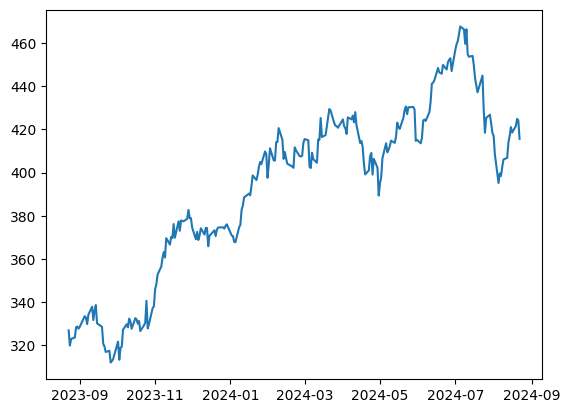

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,327.000000,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,...,317.010010,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985
1,2023-10-06,319.970001,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,...,317.540009,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010
2,2023-10-09,322.980011,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,...,312.140015,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007
3,2023-10-10,323.700012,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,...,312.790009,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015
4,2023-10-11,328.410004,328.790009,327.760010,328.660004,333.549988,332.880005,329.910004,334.269989,337.940002,...,313.640015,315.750000,321.799988,313.390015,318.959991,319.359985,327.260010,329.820007,328.390015,332.420013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,467.559998,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,...,395.149994,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001
218,2024-08-19,466.239990,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,...,399.609985,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999
219,2024-08-20,459.540009,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,...,398.429993,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988
220,2024-08-21,466.250000,454.700012,453.549988,453.959991,449.519989,443.519989,440.369995,437.109985,442.940002,...,402.690002,406.019989,406.809998,414.010010,416.859985,421.029999,418.470001,421.529999,424.799988,424.140015


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

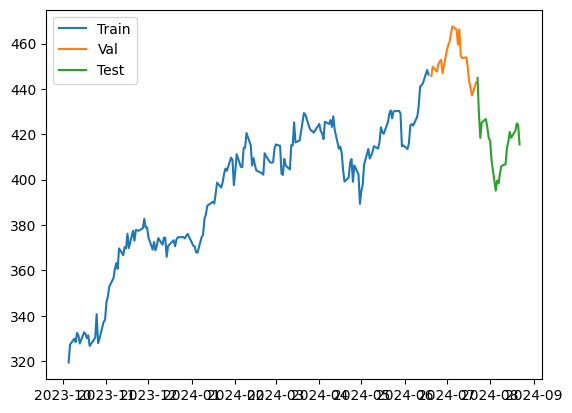

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 857ms/step - loss: 156803.8906 - mean_absolute_error: 394.8298

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 155427.4219 - mean_absolute_error: 393.1002 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 155374.5625 - mean_absolute_error: 393.0176 - val_loss: 203343.3125 - val_mean_absolute_error: 450.8620


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 151347.9688 - mean_absolute_error: 387.5197

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 152915.7031 - mean_absolute_error: 389.7178

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 153015.5156 - mean_absolute_error: 389.8986 - val_loss: 199462.3594 - val_mean_absolute_error: 446.5373


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 146991.8438 - mean_absolute_error: 382.0790

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 148526.4688 - mean_absolute_error: 384.1769

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 148459.1094 - mean_absolute_error: 384.0862 - val_loss: 190197.7344 - val_mean_absolute_error: 436.0400


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 141381.7656 - mean_absolute_error: 375.0215

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 140445.7344 - mean_absolute_error: 373.5198

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 139569.0625 - mean_absolute_error: 372.3213 - val_loss: 170694.1094 - val_mean_absolute_error: 413.0704


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 123470.4844 - mean_absolute_error: 349.9387

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 120473.6875 - mean_absolute_error: 345.7036

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 118750.0938 - mean_absolute_error: 343.1122 - val_loss: 130762.9453 - val_mean_absolute_error: 361.5187


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 85021.2031 - mean_absolute_error: 289.5385

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 81741.3906 - mean_absolute_error: 283.7458

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79141.1641 - mean_absolute_error: 278.8438 - val_loss: 65822.9375 - val_mean_absolute_error: 256.4253


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 40905.7891 - mean_absolute_error: 200.1452

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 35112.8555 - mean_absolute_error: 183.2219

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 32657.1934 - mean_absolute_error: 175.3294

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 28570.2871 - mean_absolute_error: 160.3104

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 27269.2715 - mean_absolute_error: 155.3505 - val_loss: 2598.1992 - val_mean_absolute_error: 50.2714


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2690.9937 - mean_absolute_error: 38.4652

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3038.9622 - mean_absolute_error: 43.6975

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4983.3560 - mean_absolute_error: 58.4426 - val_loss: 1541.2656 - val_mean_absolute_error: 38.3755


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11300.2383 - mean_absolute_error: 101.0142

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8849.8887 - mean_absolute_error: 86.8249  

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8076.8735 - mean_absolute_error: 81.4289 - val_loss: 2943.1992 - val_mean_absolute_error: 53.6241


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1454.6115 - mean_absolute_error: 30.0435

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1357.4113 - mean_absolute_error: 29.8119

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1541.5765 - mean_absolute_error: 32.3016 - val_loss: 11240.9170 - val_mean_absolute_error: 105.7058


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2962.4927 - mean_absolute_error: 48.6236

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3018.4043 - mean_absolute_error: 48.9663

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2932.7454 - mean_absolute_error: 48.3432 - val_loss: 7380.9590 - val_mean_absolute_error: 85.5213


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1567.1714 - mean_absolute_error: 34.6729

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1276.5468 - mean_absolute_error: 30.7598

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1253.3688 - mean_absolute_error: 30.4342 - val_loss: 2173.8311 - val_mean_absolute_error: 45.9017


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 845.1406 - mean_absolute_error: 23.8251

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1117.2705 - mean_absolute_error: 24.8448

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1186.2631 - mean_absolute_error: 25.5066 - val_loss: 1702.0372 - val_mean_absolute_error: 40.4379


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1003.9337 - mean_absolute_error: 23.2707

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1097.9221 - mean_absolute_error: 24.9099

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1091.4146 - mean_absolute_error: 25.0419 - val_loss: 4076.1267 - val_mean_absolute_error: 63.3200


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 739.4393 - mean_absolute_error: 23.5644

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 991.6750 - mean_absolute_error: 27.4098

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1004.3964 - mean_absolute_error: 27.5992 - val_loss: 5080.4297 - val_mean_absolute_error: 70.8071


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1192.8181 - mean_absolute_error: 29.4251

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1031.9924 - mean_absolute_error: 27.5262

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1025.5435 - mean_absolute_error: 27.5505 - val_loss: 3615.1736 - val_mean_absolute_error: 59.5683


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 811.4142 - mean_absolute_error: 24.1635

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 900.6823 - mean_absolute_error: 25.5012

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 913.2420 - mean_absolute_error: 25.6058 - val_loss: 3150.1924 - val_mean_absolute_error: 55.5287


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1208.4709 - mean_absolute_error: 28.6049

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1034.1265 - mean_absolute_error: 26.6129

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1005.9650 - mean_absolute_error: 26.3493 - val_loss: 3782.4336 - val_mean_absolute_error: 60.9602


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1088.5686 - mean_absolute_error: 28.9787

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1029.3157 - mean_absolute_error: 27.5175

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 998.3435 - mean_absolute_error: 27.0391 - val_loss: 3265.5283 - val_mean_absolute_error: 56.5593


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 884.9844 - mean_absolute_error: 23.8015

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 914.9953 - mean_absolute_error: 24.6390

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 921.1292 - mean_absolute_error: 24.8378 - val_loss: 3327.8955 - val_mean_absolute_error: 57.1120


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 622.9225 - mean_absolute_error: 21.1358

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 808.8010 - mean_absolute_error: 23.8063

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 839.8193 - mean_absolute_error: 24.2872 - val_loss: 3714.6775 - val_mean_absolute_error: 60.4075


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 968.4118 - mean_absolute_error: 27.3491

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 878.2499 - mean_absolute_error: 25.6896

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 871.0016 - mean_absolute_error: 25.4748

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 866.2014 - mean_absolute_error: 25.3892 - val_loss: 3602.6865 - val_mean_absolute_error: 59.4882


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1086.0411 - mean_absolute_error: 28.0418

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 883.7776 - mean_absolute_error: 25.3885 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 840.8649 - mean_absolute_error: 24.7216 - val_loss: 2973.1262 - val_mean_absolute_error: 53.9375


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 630.0513 - mean_absolute_error: 21.9868

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 694.1019 - mean_absolute_error: 22.8140

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 698.4141 - mean_absolute_error: 22.7873 - val_loss: 2641.6785 - val_mean_absolute_error: 50.7893


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 652.1000 - mean_absolute_error: 20.8505

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 680.1456 - mean_absolute_error: 21.6265

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 658.7747 - mean_absolute_error: 21.3231 - val_loss: 2697.3679 - val_mean_absolute_error: 51.3655


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 543.1633 - mean_absolute_error: 19.5432

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 505.0109 - mean_absolute_error: 18.8787

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 498.3562 - mean_absolute_error: 18.8037 - val_loss: 2299.9829 - val_mean_absolute_error: 47.3876


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 366.4540 - mean_absolute_error: 15.6455

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 348.3044 - mean_absolute_error: 15.4630

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 336.5665 - mean_absolute_error: 15.1560 - val_loss: 1510.1245 - val_mean_absolute_error: 38.1367


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 187.3684 - mean_absolute_error: 11.6682

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 222.1857 - mean_absolute_error: 11.9748

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 224.5653 - mean_absolute_error: 11.9823 - val_loss: 1071.5538 - val_mean_absolute_error: 31.9150


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 178.9480 - mean_absolute_error: 10.1328

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 151.4229 - mean_absolute_error: 9.5503 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 147.5788 - mean_absolute_error: 9.4782 - val_loss: 734.4291 - val_mean_absolute_error: 26.1028


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 66.4517 - mean_absolute_error: 6.3743

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 93.4302 - mean_absolute_error: 7.8058

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 96.3829 - mean_absolute_error: 7.9817 - val_loss: 449.2569 - val_mean_absolute_error: 19.9193


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 71.3376 - mean_absolute_error: 6.7061

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.2591 - mean_absolute_error: 6.7133

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.3672 - mean_absolute_error: 6.7841 - val_loss: 452.1126 - val_mean_absolute_error: 20.0760


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 53.1587 - mean_absolute_error: 6.1244

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.2874 - mean_absolute_error: 6.6167

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65.5708 - mean_absolute_error: 6.5700 - val_loss: 511.7468 - val_mean_absolute_error: 21.6133


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.4459 - mean_absolute_error: 5.5763

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 48.3054 - mean_absolute_error: 5.7018

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.7136 - mean_absolute_error: 5.8219 - val_loss: 498.4894 - val_mean_absolute_error: 21.3596


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 75.8079 - mean_absolute_error: 6.8608

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 65.5120 - mean_absolute_error: 6.5461

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.1191 - mean_absolute_error: 6.4298 - val_loss: 355.5508 - val_mean_absolute_error: 17.6203


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33.0356 - mean_absolute_error: 4.4404

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50.5310 - mean_absolute_error: 5.3969

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.2866 - mean_absolute_error: 5.4164 - val_loss: 302.7910 - val_mean_absolute_error: 16.0197


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 56.5550 - mean_absolute_error: 6.7303

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 55.3829 - mean_absolute_error: 6.0842

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.1555 - mean_absolute_error: 6.0472 - val_loss: 273.6865 - val_mean_absolute_error: 15.0668


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 73.0091 - mean_absolute_error: 7.3516

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.8023 - mean_absolute_error: 6.6729

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 64.4327 - mean_absolute_error: 6.6338 - val_loss: 304.4200 - val_mean_absolute_error: 16.0995


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 78.5298 - mean_absolute_error: 7.3079

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.6326 - mean_absolute_error: 6.6978

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.5173 - mean_absolute_error: 6.7307 - val_loss: 392.4846 - val_mean_absolute_error: 18.7188


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.3904 - mean_absolute_error: 3.5036

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.3135 - mean_absolute_error: 5.5206

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 55.6018 - mean_absolute_error: 5.7265 - val_loss: 376.0486 - val_mean_absolute_error: 18.2712


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.1842 - mean_absolute_error: 4.3309

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 48.5606 - mean_absolute_error: 5.5304

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.3553 - mean_absolute_error: 5.7130 - val_loss: 349.8954 - val_mean_absolute_error: 17.5158


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 38.4546 - mean_absolute_error: 4.8090

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.8138 - mean_absolute_error: 5.2852

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.0803 - mean_absolute_error: 5.2625 - val_loss: 306.1310 - val_mean_absolute_error: 16.1989


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.4655 - mean_absolute_error: 5.3608

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39.9322 - mean_absolute_error: 4.9098

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.7479 - mean_absolute_error: 4.8934 - val_loss: 274.2727 - val_mean_absolute_error: 15.1586


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 48.0024 - mean_absolute_error: 5.4604

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 58.6492 - mean_absolute_error: 6.2039

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.9490 - mean_absolute_error: 6.2283 - val_loss: 223.3513 - val_mean_absolute_error: 13.3346


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 110.7845 - mean_absolute_error: 8.9620

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.0720 - mean_absolute_error: 7.2979 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.8557 - mean_absolute_error: 7.0288 - val_loss: 244.3118 - val_mean_absolute_error: 14.1478


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 59.4533 - mean_absolute_error: 6.0926

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 61.1392 - mean_absolute_error: 6.1415

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 59.1053 - mean_absolute_error: 6.0311 - val_loss: 315.6069 - val_mean_absolute_error: 16.5516


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.1817 - mean_absolute_error: 3.0242

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.3242 - mean_absolute_error: 4.0065

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.2715 - mean_absolute_error: 4.1506 - val_loss: 378.3321 - val_mean_absolute_error: 18.4007


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 39.1313 - mean_absolute_error: 5.0716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 38.1949 - mean_absolute_error: 4.9619

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.6740 - mean_absolute_error: 4.9240 - val_loss: 351.8232 - val_mean_absolute_error: 17.7017


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 31.5737 - mean_absolute_error: 4.0851

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.0627 - mean_absolute_error: 4.1938

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.5331 - mean_absolute_error: 4.2564 - val_loss: 341.3844 - val_mean_absolute_error: 17.4034


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.5421 - mean_absolute_error: 5.0205

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36.6076 - mean_absolute_error: 4.7126

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.8997 - mean_absolute_error: 4.6700 - val_loss: 304.1249 - val_mean_absolute_error: 16.2737


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.0884 - mean_absolute_error: 3.7938

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.2275 - mean_absolute_error: 4.3802

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30.8976 - mean_absolute_error: 4.4101 - val_loss: 253.1389 - val_mean_absolute_error: 14.6245


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 33.4828 - mean_absolute_error: 4.6212

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.5627 - mean_absolute_error: 4.3930

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.4300 - mean_absolute_error: 4.3705 - val_loss: 220.6153 - val_mean_absolute_error: 13.4403


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.1971 - mean_absolute_error: 5.0716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.6583 - mean_absolute_error: 4.5777

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.1795 - mean_absolute_error: 4.4884 - val_loss: 212.0868 - val_mean_absolute_error: 13.1386


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.1358 - mean_absolute_error: 4.2636

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.4921 - mean_absolute_error: 4.2413

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.2611 - mean_absolute_error: 4.2186 - val_loss: 159.6204 - val_mean_absolute_error: 10.9693


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 58.9146 - mean_absolute_error: 6.1720

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50.0886 - mean_absolute_error: 5.8166

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.5657 - mean_absolute_error: 5.7870 - val_loss: 159.4483 - val_mean_absolute_error: 10.9700


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.1597 - mean_absolute_error: 5.5367

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.0904 - mean_absolute_error: 4.9067

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.8411 - mean_absolute_error: 4.8837 - val_loss: 193.5125 - val_mean_absolute_error: 12.4328


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.5111 - mean_absolute_error: 4.0027

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.8251 - mean_absolute_error: 4.4659

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30.7898 - mean_absolute_error: 4.5378 - val_loss: 160.6228 - val_mean_absolute_error: 11.0329


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.0990 - mean_absolute_error: 5.7118

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.8698 - mean_absolute_error: 5.0013

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.7494 - mean_absolute_error: 4.9500 - val_loss: 188.7171 - val_mean_absolute_error: 12.2942


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 30.3855 - mean_absolute_error: 4.5468

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.9402 - mean_absolute_error: 4.7914

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.0533 - mean_absolute_error: 4.7911 - val_loss: 180.1664 - val_mean_absolute_error: 11.9399


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.8819 - mean_absolute_error: 4.4355

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.1760 - mean_absolute_error: 4.3824

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30.2391 - mean_absolute_error: 4.3532 - val_loss: 205.9423 - val_mean_absolute_error: 13.0287


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.0140 - mean_absolute_error: 3.9372

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.4028 - mean_absolute_error: 3.9249

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27.2482 - mean_absolute_error: 3.9458 - val_loss: 209.9183 - val_mean_absolute_error: 13.1792


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 35.1756 - mean_absolute_error: 4.8234

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.3162 - mean_absolute_error: 4.2412

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.7986 - mean_absolute_error: 4.2049 - val_loss: 185.9541 - val_mean_absolute_error: 12.1944


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.7995 - mean_absolute_error: 3.8458

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.4668 - mean_absolute_error: 4.0352

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.3594 - mean_absolute_error: 4.0664 - val_loss: 211.9126 - val_mean_absolute_error: 13.2700


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.4802 - mean_absolute_error: 4.2781

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.6774 - mean_absolute_error: 4.4234

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.8848 - mean_absolute_error: 4.3677 - val_loss: 207.3385 - val_mean_absolute_error: 13.1446


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 28.4616 - mean_absolute_error: 4.2767

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.2610 - mean_absolute_error: 4.4854

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8559 - mean_absolute_error: 4.5122 - val_loss: 253.2411 - val_mean_absolute_error: 14.8478


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 56.6163 - mean_absolute_error: 6.6114

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.7525 - mean_absolute_error: 5.3408

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39.8393 - mean_absolute_error: 5.1694 - val_loss: 209.8711 - val_mean_absolute_error: 13.2405


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 35.3493 - mean_absolute_error: 4.5571

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.7950 - mean_absolute_error: 4.1810

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9995 - mean_absolute_error: 4.1392 - val_loss: 214.8048 - val_mean_absolute_error: 13.4763


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 32.0940 - mean_absolute_error: 4.4980

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.8316 - mean_absolute_error: 4.1336

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.1464 - mean_absolute_error: 4.1472 - val_loss: 202.5276 - val_mean_absolute_error: 12.9859


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 38.6143 - mean_absolute_error: 5.2124

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 31.5022 - mean_absolute_error: 4.4955

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 29.9827 - mean_absolute_error: 4.3672 - val_loss: 174.2716 - val_mean_absolute_error: 11.8224


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 24.9668 - mean_absolute_error: 4.1382

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 25.5911 - mean_absolute_error: 4.0735

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 24.3669 - mean_absolute_error: 3.8976

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 24.5392 - mean_absolute_error: 3.9024 - val_loss: 126.5898 - val_mean_absolute_error: 9.5863


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.0772 - mean_absolute_error: 4.1733

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.1792 - mean_absolute_error: 4.0552

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.6268 - mean_absolute_error: 4.0381 - val_loss: 166.5308 - val_mean_absolute_error: 11.5296


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 23.4587 - mean_absolute_error: 3.8168

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.5274 - mean_absolute_error: 3.8980

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.0173 - mean_absolute_error: 3.9302 - val_loss: 174.6926 - val_mean_absolute_error: 11.9232


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 21.8603 - mean_absolute_error: 3.4303

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.2934 - mean_absolute_error: 3.7726

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.7735 - mean_absolute_error: 3.9381 - val_loss: 267.4471 - val_mean_absolute_error: 15.4415


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 70.4784 - mean_absolute_error: 7.7567

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 55.0284 - mean_absolute_error: 6.4299

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 53.3171 - mean_absolute_error: 6.2413 - val_loss: 209.6539 - val_mean_absolute_error: 13.3784


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 44.7059 - mean_absolute_error: 5.6006

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 38.5731 - mean_absolute_error: 5.0893

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 38.2789 - mean_absolute_error: 5.0756 - val_loss: 139.1893 - val_mean_absolute_error: 10.2075


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.9241 - mean_absolute_error: 3.9085

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.9007 - mean_absolute_error: 4.3809

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 32.7733 - mean_absolute_error: 4.3944 - val_loss: 104.6318 - val_mean_absolute_error: 8.5640


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 39.9149 - mean_absolute_error: 5.2370

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 43.6985 - mean_absolute_error: 5.3401

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.2663 - mean_absolute_error: 5.2335 - val_loss: 130.6076 - val_mean_absolute_error: 9.8014


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.7879 - mean_absolute_error: 3.1968

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.5484 - mean_absolute_error: 3.6792

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.3784 - mean_absolute_error: 3.7620 - val_loss: 120.5167 - val_mean_absolute_error: 9.3114


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.2870 - mean_absolute_error: 4.0789

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.4625 - mean_absolute_error: 4.0074

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.2254 - mean_absolute_error: 3.9900 - val_loss: 147.5394 - val_mean_absolute_error: 10.6812


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.1694 - mean_absolute_error: 3.7287

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25.2855 - mean_absolute_error: 3.9342

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.0375 - mean_absolute_error: 3.9140 - val_loss: 125.9851 - val_mean_absolute_error: 9.6084


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.7325 - mean_absolute_error: 3.6442

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.2908 - mean_absolute_error: 3.5045

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.1684 - mean_absolute_error: 3.7292 - val_loss: 154.2545 - val_mean_absolute_error: 11.0429


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 29.5932 - mean_absolute_error: 4.0955

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.0544 - mean_absolute_error: 3.8313

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.9918 - mean_absolute_error: 3.9130 - val_loss: 165.0240 - val_mean_absolute_error: 11.5616


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 30.1740 - mean_absolute_error: 4.6076

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.8011 - mean_absolute_error: 4.6691

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.1779 - mean_absolute_error: 4.6842 - val_loss: 110.8450 - val_mean_absolute_error: 8.8826


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.1493 - mean_absolute_error: 3.6262

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.7971 - mean_absolute_error: 3.9865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.9184 - mean_absolute_error: 4.0752 - val_loss: 109.7055 - val_mean_absolute_error: 8.8214


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 38.2512 - mean_absolute_error: 4.6204

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.9791 - mean_absolute_error: 4.4952

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.3805 - mean_absolute_error: 4.5383 - val_loss: 80.9461 - val_mean_absolute_error: 7.4310


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 59.4148 - mean_absolute_error: 5.9763

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42.8587 - mean_absolute_error: 5.2207

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.6238 - mean_absolute_error: 5.0959 - val_loss: 92.9539 - val_mean_absolute_error: 8.0427


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29.0138 - mean_absolute_error: 4.4726

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.2836 - mean_absolute_error: 4.1201

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.1677 - mean_absolute_error: 4.1931 - val_loss: 82.9753 - val_mean_absolute_error: 7.5282


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 62.4006 - mean_absolute_error: 6.3788

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46.8610 - mean_absolute_error: 5.4898

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.2421 - mean_absolute_error: 5.3948 - val_loss: 162.6678 - val_mean_absolute_error: 11.5079


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.4580 - mean_absolute_error: 3.8304

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 35.1544 - mean_absolute_error: 4.4525

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.5306 - mean_absolute_error: 4.4185 - val_loss: 140.0470 - val_mean_absolute_error: 10.3518


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 19.2949 - mean_absolute_error: 3.3469

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.3492 - mean_absolute_error: 3.8450

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 26.3718 - mean_absolute_error: 3.9281 - val_loss: 118.7955 - val_mean_absolute_error: 9.2674


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.5361 - mean_absolute_error: 4.0113

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.8608 - mean_absolute_error: 4.1416

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27.4924 - mean_absolute_error: 4.1206 - val_loss: 109.3385 - val_mean_absolute_error: 8.7975


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.7169 - mean_absolute_error: 4.2454

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.2297 - mean_absolute_error: 4.4584

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31.0788 - mean_absolute_error: 4.4480 - val_loss: 94.4900 - val_mean_absolute_error: 8.1076


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.8935 - mean_absolute_error: 3.5361

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.9764 - mean_absolute_error: 3.9723

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.9536 - mean_absolute_error: 3.9433 - val_loss: 129.3271 - val_mean_absolute_error: 9.8794


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.2464 - mean_absolute_error: 3.2447

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.0792 - mean_absolute_error: 3.7115

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.6259 - mean_absolute_error: 3.7606 - val_loss: 121.5085 - val_mean_absolute_error: 9.4503


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23.9555 - mean_absolute_error: 3.7630

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.9490 - mean_absolute_error: 3.8104

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.9084 - mean_absolute_error: 3.8272 - val_loss: 104.9774 - val_mean_absolute_error: 8.5947


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.8931 - mean_absolute_error: 3.4140

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.7070 - mean_absolute_error: 3.8636

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.9697 - mean_absolute_error: 3.8886 - val_loss: 98.0578 - val_mean_absolute_error: 8.2759


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 26.6324 - mean_absolute_error: 4.1359

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.2278 - mean_absolute_error: 3.9237

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.8226 - mean_absolute_error: 3.9610 - val_loss: 108.4624 - val_mean_absolute_error: 8.7871


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.4250 - mean_absolute_error: 4.0492

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.6940 - mean_absolute_error: 3.9152

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.7267 - mean_absolute_error: 3.8933 - val_loss: 124.2877 - val_mean_absolute_error: 9.6697


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 27.4189 - mean_absolute_error: 4.2979

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.5029 - mean_absolute_error: 3.9106

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.7104 - mean_absolute_error: 3.9088 - val_loss: 146.0042 - val_mean_absolute_error: 10.7639


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42.4889 - mean_absolute_error: 5.3465

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.3784 - mean_absolute_error: 4.4141

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.9911 - mean_absolute_error: 4.3809 - val_loss: 85.5137 - val_mean_absolute_error: 7.6877


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 18.1873 - mean_absolute_error: 3.4797

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.3442 - mean_absolute_error: 4.8003

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.5294 - mean_absolute_error: 4.9639 - val_loss: 62.9458 - val_mean_absolute_error: 6.4242


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


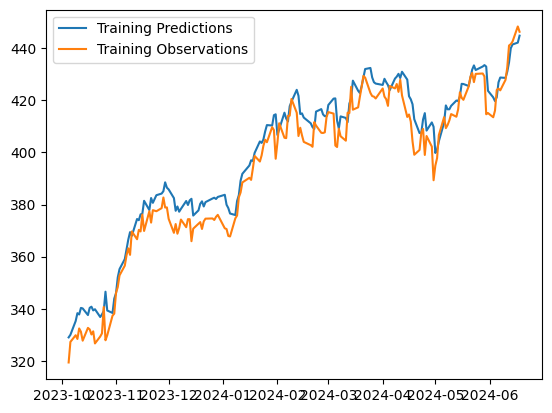

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + "training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


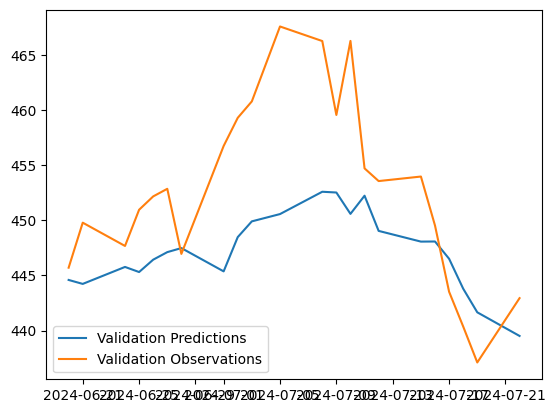

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + "validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


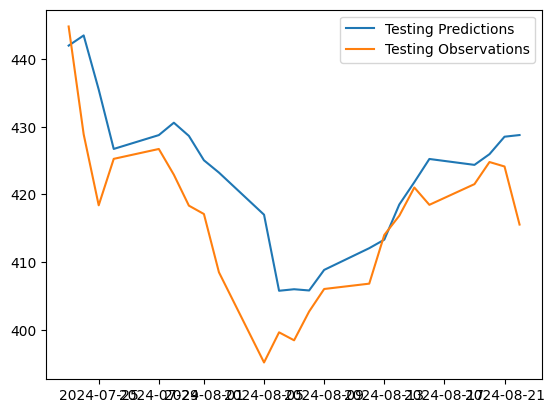

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + "testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
